In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
data = pd.read_excel("ECOMM DATA.xlsx")
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
22289,49885,CG-2011-6740,2011-09-02,2011-09-03,First Class,SO-10335,Sean O'Donnell,Consumer,Kinshasa,Kinshasa,...,OFF-HON-10001102,Office Supplies,Labels,"Hon Legal Exhibit Labels, Adjustable",35.040,4,0.0,5.520,10.300,High
15340,13685,ES-2011-5898391,2011-12-09,2011-12-10,First Class,MG-17650,Matthew Grinstein,Home Office,Lunel,Languedoc-Roussillon,...,OFF-FA-10004424,Office Supplies,Fasteners,"Advantus Clamps, 12 Pack",112.320,6,0.0,17.820,19.080,High
7220,3595,US-2014-119522,2014-07-21,2014-07-23,Second Class,SR-20425,Sharelle Roach,Home Office,Buenos Aires,Buenos Aires,...,TEC-PH-10000990,Technology,Phones,"Cisco Signal Booster, with Caller ID",364.392,6,0.4,-60.768,47.285,High
17532,5556,MX-2012-119207,2012-03-13,2012-03-19,Standard Class,TH-21115,Thea Hudgings,Corporate,Tlalpan,Distrito Federal,...,OFF-EN-10000031,Office Supplies,Envelopes,"Ames Peel and Seal, Security-Tint",140.600,10,0.0,26.600,15.599,Medium
12880,24901,IN-2014-60175,2014-10-14,2014-10-19,Standard Class,HJ-14875,Heather Jas,Home Office,Ipoh,Perak,...,OFF-EN-10002472,Office Supplies,Envelopes,"Cameo Interoffice Envelope, Security-Tint",348.810,7,0.0,156.870,24.300,Medium


## EDA

Basic EDA wasdone to get to know the data, what and where are the missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [4]:
data.shape

(51290, 24)

In [5]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,51290.0,25645.5,1.0,12823.25,25645.5,38467.75,51290.0,14806.29199
Order Date,51290,2013-05-11 21:26:49.155781120,2011-01-01 00:00:00,2012-06-19 00:00:00,2013-07-08 00:00:00,2014-05-22 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,51290,2013-05-15 20:42:42.745174528,2011-01-03 00:00:00,2012-06-23 00:00:00,2013-07-12 00:00:00,2014-05-26 00:00:00,2015-01-07 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,51290.0,246.490581,0.444,30.758625,85.053,251.0532,22638.48,487.565361
Quantity,51290.0,3.476545,1.0,2.0,3.0,5.0,14.0,2.278766
Discount,51290.0,0.142908,0.0,0.0,0.0,0.2,0.85,0.21228
Profit,51290.0,28.610982,-6599.978,0.0,9.24,36.81,8399.976,174.340972
Shipping Cost,51290.0,26.375818,0.002,2.61,7.79,24.45,933.57,57.29681


In [6]:
data.describe(include='O').T

,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51290,13,Central,11117


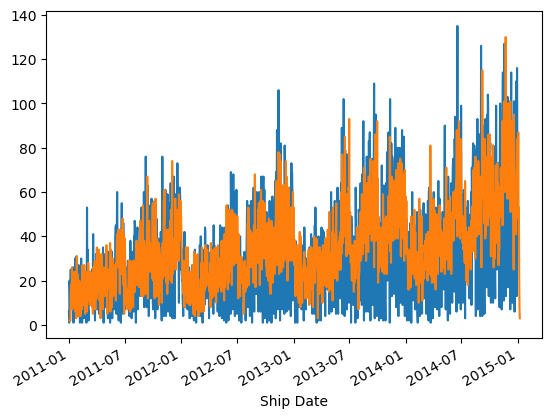

In [7]:
data['Order Date'].value_counts().sort_index().plot(kind='line')
data['Ship Date'].value_counts().sort_index().plot(kind='line')
plt.show()

There is some seasonality in the frequency of Orders and Shipping done over time.

## Feature Engineering

In [8]:
# Let's calculate the time taken for fulfillment of an order
data['Ship_Duration'] = data['Ship Date']-data['Order Date']
data[['Ship_Duration','Order Priority']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Ship_Duration   51290 non-null  timedelta64[ns]
 1   Order Priority  51290 non-null  object         
dtypes: object(1), timedelta64[ns](1)
memory usage: 801.5+ KB


In [9]:
# Change the fieled to number type
data['Ship_Duration_num'] = data['Ship_Duration'].dt.days
data['Ship_Duration_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: Ship_Duration_num
Non-Null Count  Dtype
--------------  -----
51290 non-null  int64
dtypes: int64(1)
memory usage: 400.8 KB


## Time Taken v/s Priority

<Axes: xlabel='Ship_Duration_num', ylabel='Density'>

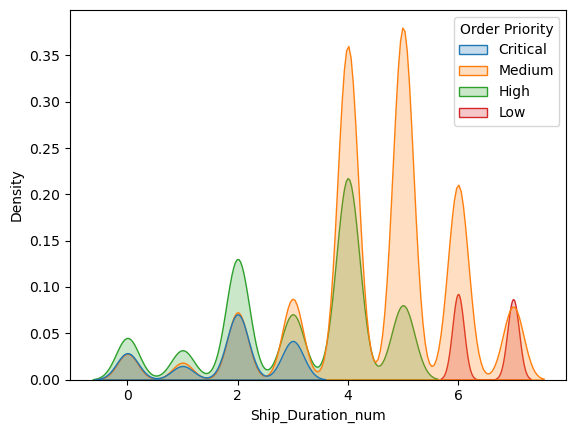

In [10]:
# Let's plot a density plot to show where most of the orders lie
sns.kdeplot(data,x='Ship_Duration_num',fill=True,hue='Order Priority')

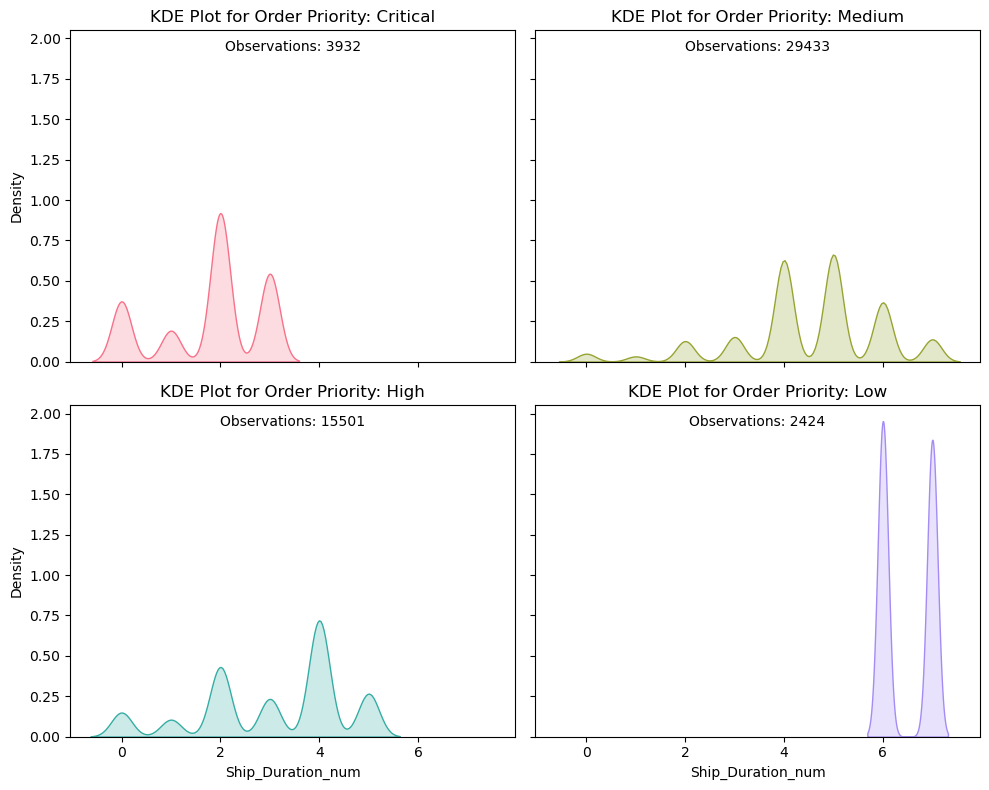

In [11]:
# The above plot is a little difficult to interpret, let's make some subplots

# Get unique Order Priority categories
order_priorities = data['Order Priority'].unique()

# Define a color palette with enough colors for each Order Priority category
palette = sns.color_palette("husl", len(order_priorities))

# Create subplots with a 2x2 layout
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True,figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a for loop to iterate over each Order Priority category
for i, (priority, color) in enumerate(zip(order_priorities, palette)):
    # Filter data for the current Order Priority category
    filtered_data = data[data['Order Priority'] == priority]
    
    # Create a KDE plot for the current Order Priority category on the corresponding subplot
    sns.kdeplot(data=filtered_data, x='Ship_Duration_num', fill=True, ax=axes[i], color=color)
    
    # Set plot title
    axes[i].set_title(f'KDE Plot for Order Priority: {priority}')

# Add text annotation for the number of observations
    num_observations = len(filtered_data)
    axes[i].text(0.5, 0.95, f'Observations: {num_observations}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


We can see that :
1. Critical -> 0-4 days
2. High -> 0-6 days
3. Medium -> 0-7 days
4. Low -> 6-7 days


## Product Categories

C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\2278012655.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data[data['Profit']>0][data['Category'] == category]['Sub-Category'].value_counts(ascending=False)
C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\2278012655.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data[data['Profit']>0][data['Category'] == category]['Sub-Category'].value_counts(ascending=False)
C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\2278012655.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = data[data['Profit']>0][data['Category'] == category]['Sub-Category'].value_counts(ascending=False)


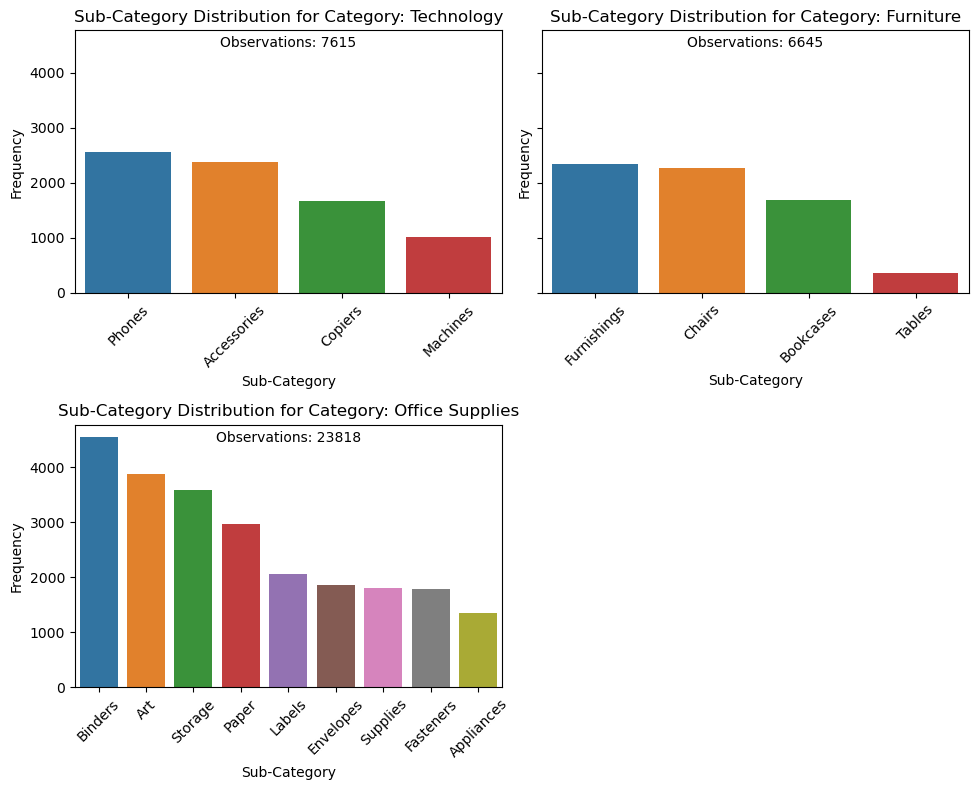

In [12]:
# Get unique Category categories
categories = data['Category'].unique()

# Create subplots with a 2x2 layout
fig, axes = plt.subplots(2, 2,sharey=True,figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a for loop to iterate over each Category
for i, category in enumerate(categories):
    # Filter data for the current Category
    filtered_data = data[data['Profit']>0][data['Category'] == category]['Sub-Category'].value_counts(ascending=False)
    
    # Create a bar plot for the current Category on the corresponding subplot
    sns.barplot(x=filtered_data.index,y=filtered_data.values, ax=axes[i])

    # Add text annotation for the number of observations
    num_observations = sum(filtered_data.values)
    axes[i].text(0.5, 0.95, f'Observations: {num_observations}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
    
    # Set plot title
    axes[i].set_title(f'Sub-Category Distribution for Category: {category}')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    axes[i].set_ylabel('Frequency')
    
# Adjust layout
plt.tight_layout()

# Turn off the irrelevant axis
axes[3].axis('off')


# Show the plot
plt.show()

The plot shows that for :
1. Technology - Phones and Accessories are most frequently bought while other sub-categories falling only a little behind
2. Furniture - Furnishings, Chairs and Bookcases are frequenlty bought against Tables
3. Office Supplies - It has the most sub-categories and most prominent among them are Blinders

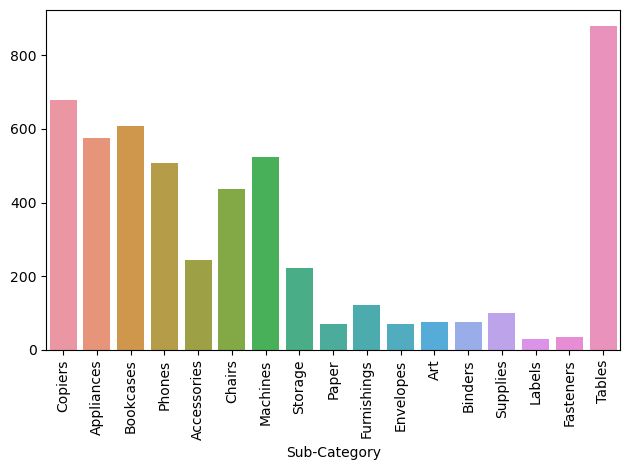

In [13]:
# Extract sub-category and profit columns, then set sub-category as index
sub_cat_mean_pft = data[['Sub-Category','Profit']].set_index('Sub-Category')

# Calculate the mean profit for each sub-category and sort in descending order
sub_cat_mean_pft = sub_cat_mean_pft.groupby(sub_cat_mean_pft.index)['Profit'].mean().sort_values(ascending=False)

# Calculate the mean sales for each sub-category, sorted in descending order
sub_cat_mean = data.groupby('Sub-Category')['Sales'].mean().sort_values(ascending=False)

# Plot a bar plot using seaborn, specifying sub-category order based on profit mean
sns.barplot(x=sub_cat_mean.index, y=sub_cat_mean.values, order=sub_cat_mean_pft.index)

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Format y-axis labels with thousand separators
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()

The above plot helps identify both the *Total Sales* and *Total Profit* for each sub-category. We can see that even though the total sales of Tables is highest, it is not very profitable. In fact it is in negatives, as you can see in the below graph.

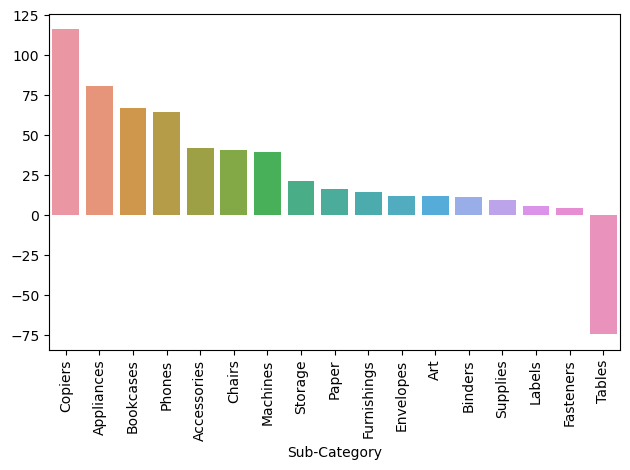

In [14]:
sns.barplot(x=sub_cat_mean_pft.index, y=sub_cat_mean_pft.values, order=sub_cat_mean_pft.index)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

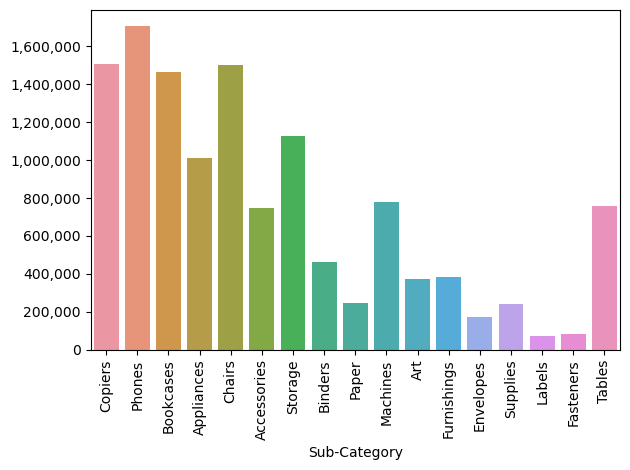

In [15]:
sub_cat_sum_pft = data[['Sub-Category','Profit']].set_index('Sub-Category')
sub_cat_sum_pft = sub_cat_sum_pft.groupby(sub_cat_sum_pft.index)['Profit'].sum().sort_values(ascending=False)

sub_cat_sum = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sub_cat_sum.index, y=sub_cat_sum.values,order=sub_cat_sum_pft.index)
plt.xticks(rotation='vertical')
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
)
plt.tight_layout()

plt.show()

Similarly a plot showing average sale of each subcategory is shown.

## Sales Trend Over Time

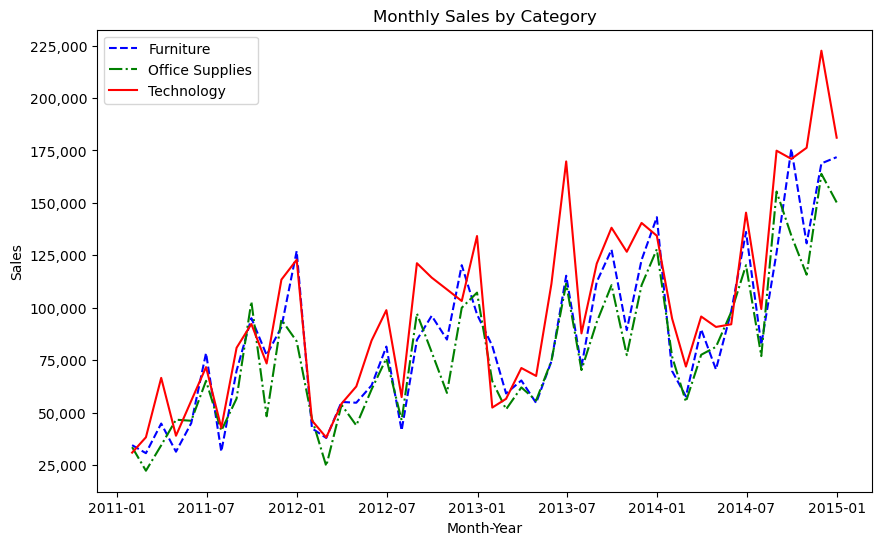

In [16]:
# Filter data for each category and resample by month-year, then sum the values
furniture_data = data[data['Category'] == 'Furniture'][['Order Date','Sales']].resample('M', on='Order Date').sum()
office_supplies_data = data[data['Category'] == 'Office Supplies'][['Order Date','Sales']].resample('M', on='Order Date').sum()
technology_data = data[data['Category'] == 'Technology'][['Order Date','Sales']].resample('M', on='Order Date').sum()

# Plot each category with different colors
plt.figure(figsize=(10, 6))

# Plot Furniture data
plt.plot(furniture_data.index, furniture_data['Sales'], label='Furniture', color='blue',linestyle='--')

# Plot Office Supplies data
plt.plot(office_supplies_data.index, office_supplies_data['Sales'], label='Office Supplies', color='green',linestyle='-.')

# Plot Technology data
plt.plot(technology_data.index, technology_data['Sales'], label='Technology', color='red',linestyle='-')

# Add labels and title
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales by Category')
plt.legend()

plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
)

# Show the plot
plt.show()


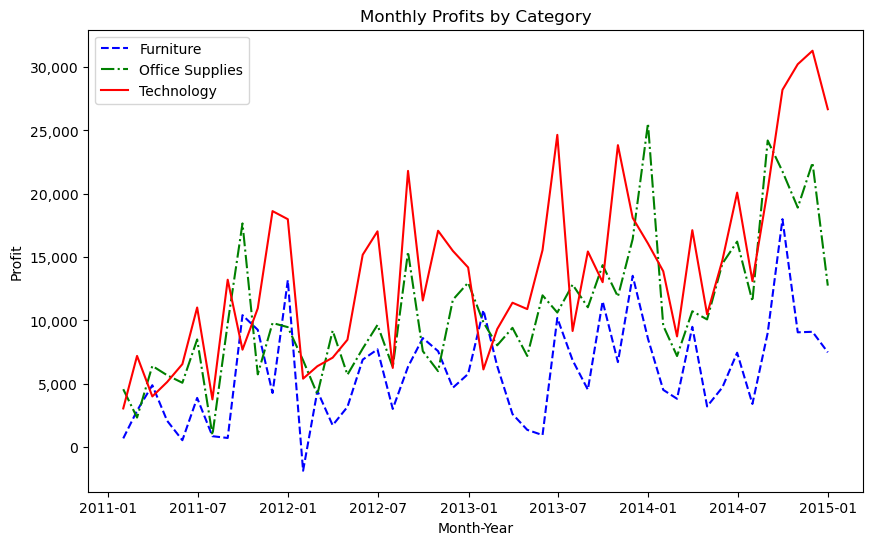

In [17]:
furniture_data = data[data['Category'] == 'Furniture'][['Order Date','Profit']].resample('M', on='Order Date').sum()
office_supplies_data = data[data['Category'] == 'Office Supplies'][['Order Date','Profit']].resample('M', on='Order Date').sum()
technology_data = data[data['Category'] == 'Technology'][['Order Date','Profit']].resample('M', on='Order Date').sum()

plt.figure(figsize=(10, 6))

plt.plot(furniture_data.index, furniture_data['Profit'], label='Furniture', color='blue', linestyle='--')
plt.plot(office_supplies_data.index, office_supplies_data['Profit'], label='Office Supplies', color='green', linestyle='-.')
plt.plot(technology_data.index, technology_data['Profit'], label='Technology', color='red', linestyle='-')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.xlabel('Month-Year')
plt.ylabel('Profit')
plt.title('Monthly Profits by Category')
plt.legend()

plt.show()


We can see from both the plots above that there has been a seasonality experinced in each category whether it be *Total Sales* or *Total Profit*, but we can see that there is a seasonality in the time series and the Technology category has been more profitable then the other two categories.

## Customer-cum-Segment wise Analysis

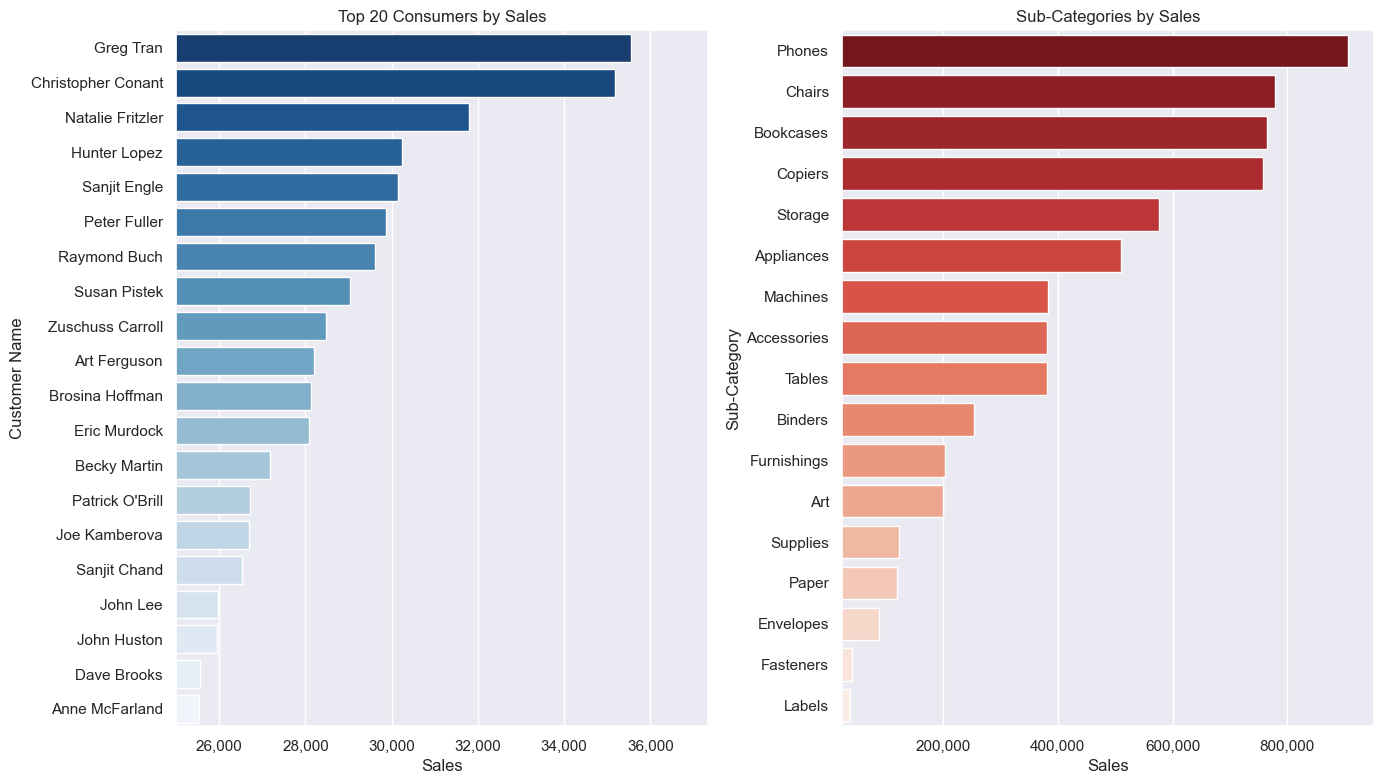

In [18]:
# Set seaborn theme
sns.set_theme()

# Top 20 customers by sales
tp_20_cstmr_sum = data[data['Segment']=='Consumer'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Top 20 sub-categories by sales
tp_20_subcat_sum = data[data['Segment']=='Consumer'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(20)

# Create figure and subplots
plt.figure(figsize=(14, 8))  # Adjust the figure size

# Plot for top 20 customers by sales
plt.subplot(1, 2, 1)
sns.barplot(x=tp_20_cstmr_sum.values, y=tp_20_cstmr_sum.index, palette='Blues_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Top 20 Consumers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.xlim(25000)

# Plot for top 20 sub-categories by sales
plt.subplot(1, 2, 2)
sns.barplot(x=tp_20_subcat_sum.values, y=tp_20_subcat_sum.index, palette='Reds_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.xlim(25000)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


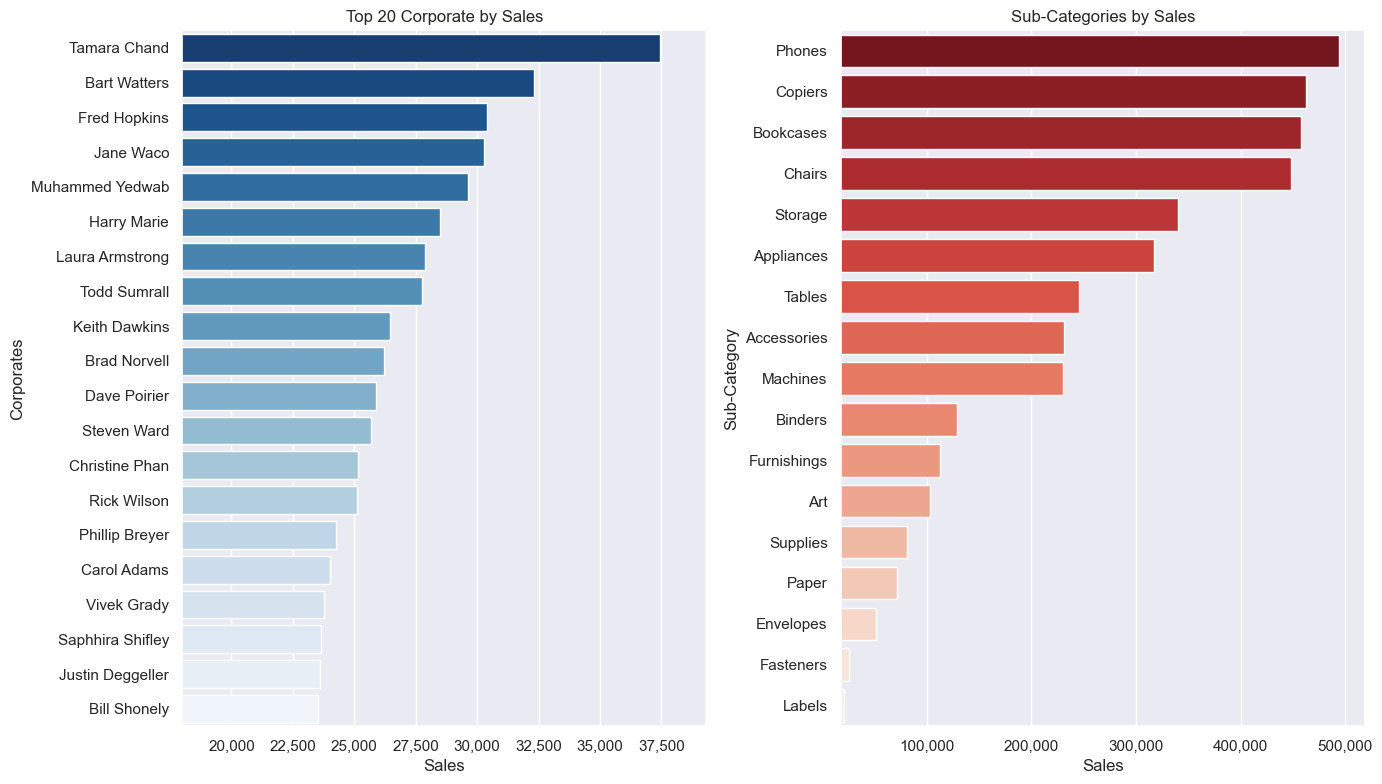

In [19]:
# Set seaborn theme
sns.set_theme()

# Top 20 customers by sales
tp_20_cstmr_sum = data[data['Segment']=='Corporate'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Top 20 sub-categories by sales
tp_20_subcat_sum = data[data['Segment']=='Corporate'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Create figure and subplots
plt.figure(figsize=(14, 8))  # Adjust the figure size

# Plot for top 20 customers by sales
plt.subplot(1, 2, 1)
sns.barplot(x=tp_20_cstmr_sum.values, y=tp_20_cstmr_sum.index, palette='Blues_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Top 20 Corporate by Sales')
plt.xlabel('Sales')
plt.ylabel('Corporates')
plt.xlim(18000)

# Plot for top 20 sub-categories by sales
plt.subplot(1, 2, 2)
sns.barplot(x=tp_20_subcat_sum.values, y=tp_20_subcat_sum.index, palette='Reds_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.xlim(18000)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


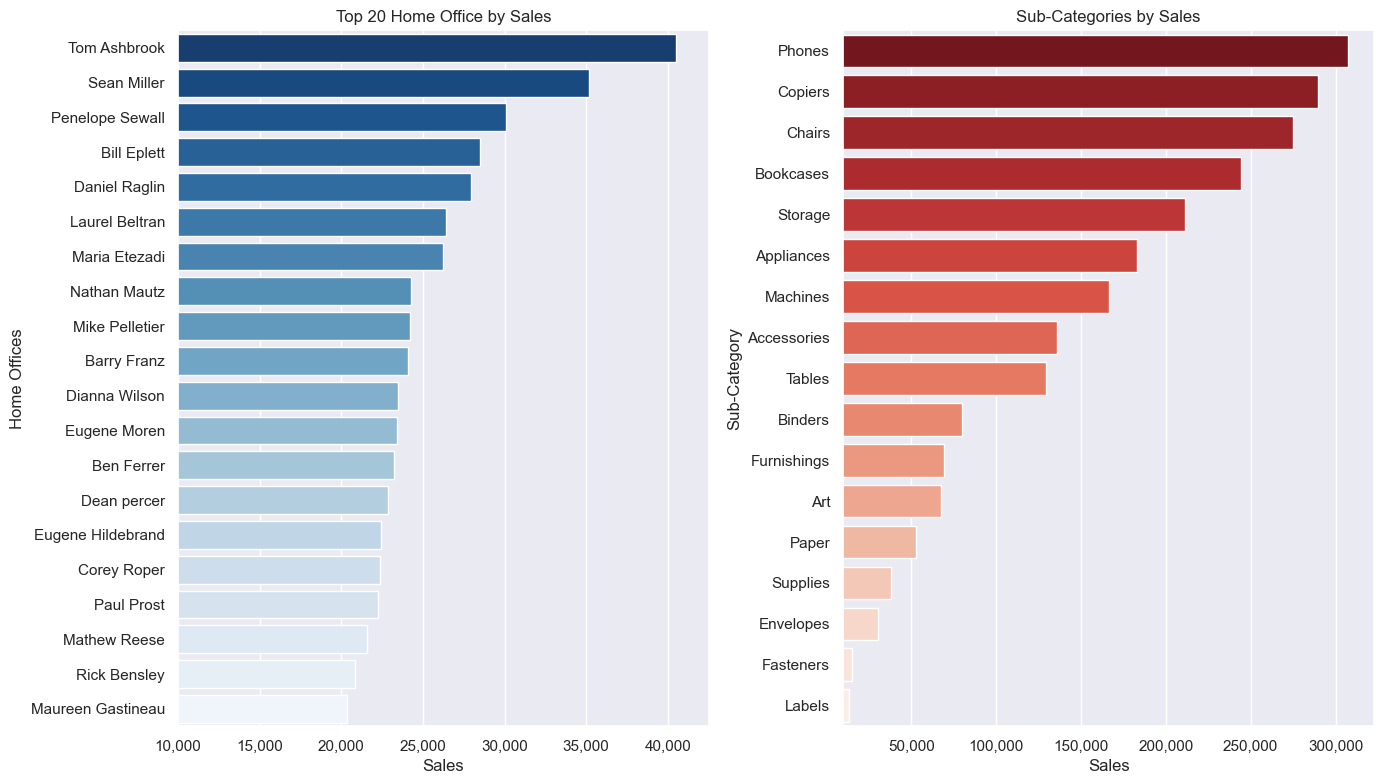

In [20]:
# Set seaborn theme
sns.set_theme()

# Top 20 customers by sales
tp_20_cstmr_sum = data[data['Segment']=='Home Office'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Top 20 sub-categories by sales
tp_20_subcat_sum = data[data['Segment']=='Home Office'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Create figure and subplots
plt.figure(figsize=(14, 8))  # Adjust the figure size

# Plot for top 20 customers by sales
plt.subplot(1, 2, 1)
sns.barplot(x=tp_20_cstmr_sum.values, y=tp_20_cstmr_sum.index, palette='Blues_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Top 20 Home Office by Sales')
plt.xlabel('Sales')
plt.ylabel('Home Offices')
plt.xlim(10000)

# Plot for top 20 sub-categories by sales
plt.subplot(1, 2, 2)
sns.barplot(x=tp_20_subcat_sum.values, y=tp_20_subcat_sum.index, palette='Reds_r')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.xlim(10000)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In all the three segments we can see that the top 5 Products are the same and influencing the sales, with Phones being prominent in all. The other products are a bit different in all though:
1. Consumers - Chairs followed by Bookcases
2. Corporates - Copiers followed by Bookcases
3. Home Office - Copiers followed by Chairs then Bookcases

This insight shows us that Corporates and Home Offices use Copiers a lot so that they are more buying it more, while consumers and Corporates have similar prefernec over Bookcases

## Geospatial Insights

In [21]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
data['CODE']=alpha3code(data['Country'])
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Ship_Duration,Ship_Duration_num,CODE
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0 days,0,USA
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2 days,2,AUS
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1 days,1,AUS
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2 days,2,DEU
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1 days,1,SEN


C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\3573406843.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


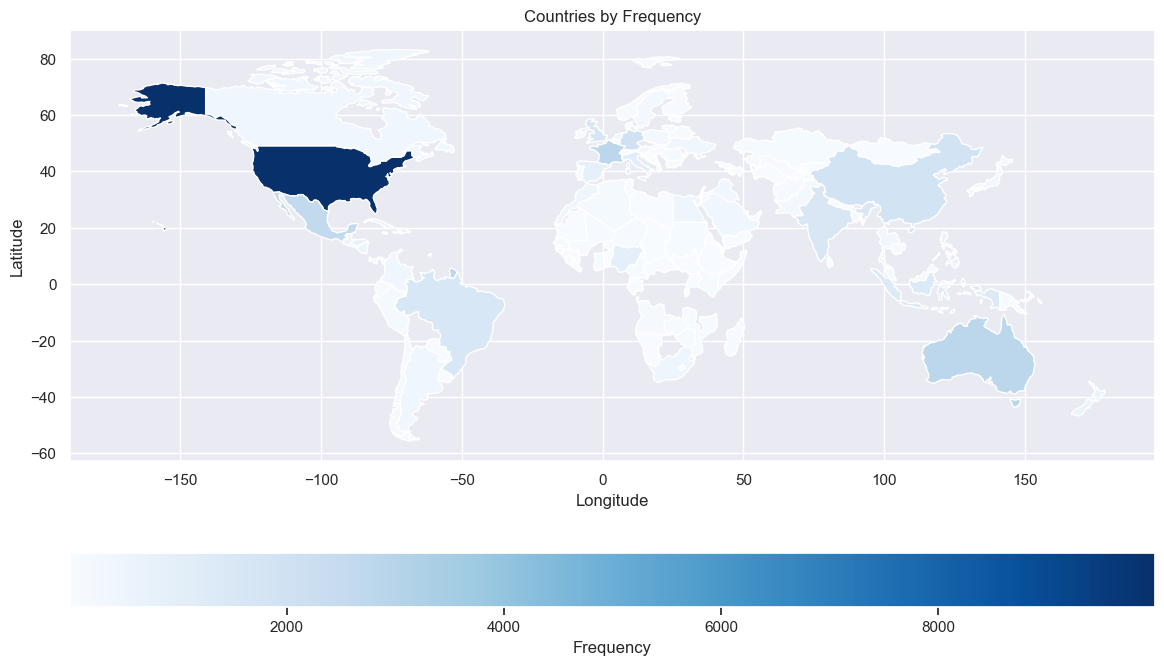

In [22]:
import geopandas as gpd

country_frequencies = pd.DataFrame(data['CODE'].value_counts())

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with frequency data
world = world.merge(country_frequencies, how='left', left_on='iso_a3', right_on='CODE')


# Plot the map with a specified palette
fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax,column='count', cmap='Blues', legend=True, 
           legend_kwds={'label': "Frequency", 'orientation': "horizontal"})

# Customize the plot
plt.title('Countries by Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\3032256638.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


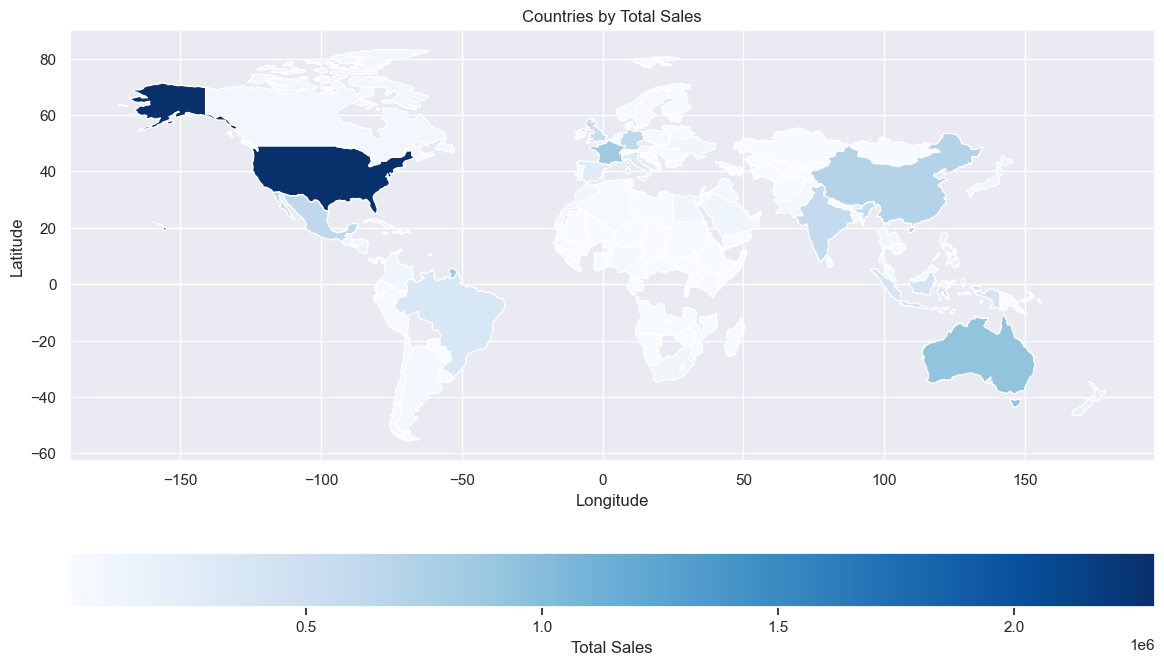

In [23]:
import geopandas as gpd

country_total_sales = pd.DataFrame(data.groupby('CODE')['Sales'].sum())

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with frequency data
world = world.merge(country_total_sales, how='left', left_on='iso_a3', right_on='CODE')


# Plot the map with a specified palette
fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax,column='Sales', cmap='Blues', legend=True, 
           legend_kwds={'label': "Total Sales", 'orientation': "horizontal"})

# Customize the plot
plt.title('Countries by Total Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


C:\Users\Shubhanshu\AppData\Local\Temp\ipykernel_14740\1100938752.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


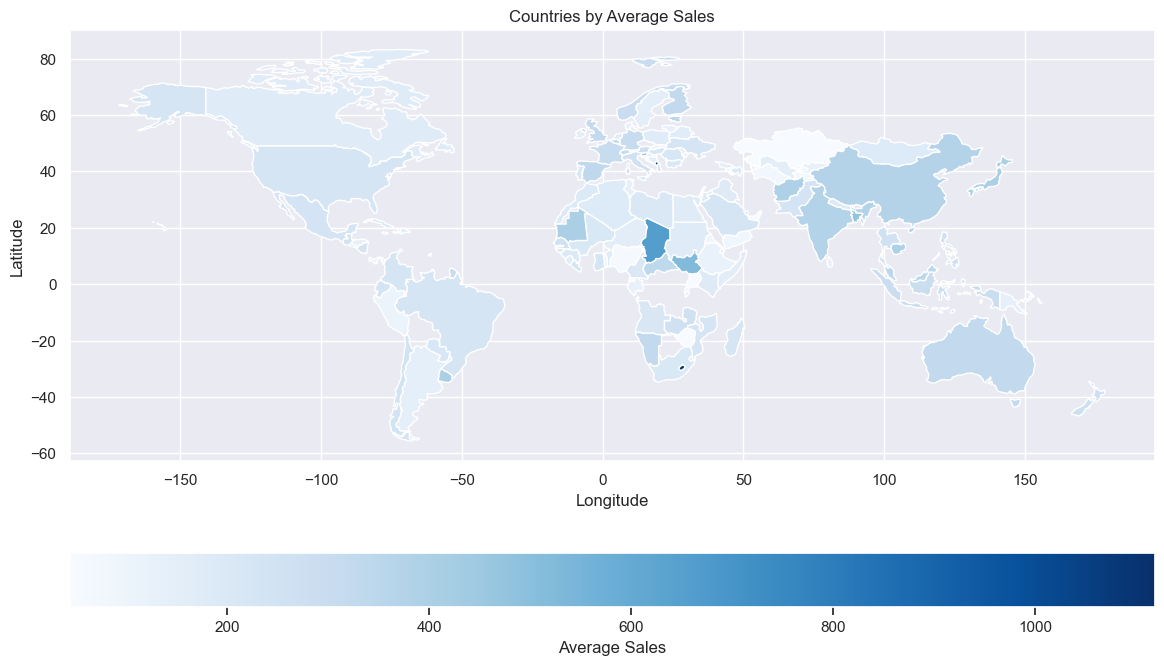

In [25]:
import geopandas as gpd

country_avg_sales = pd.DataFrame(data.groupby('CODE')['Sales'].mean())

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with frequency data
world = world.merge(country_avg_sales, how='left', left_on='iso_a3', right_on='CODE')


# Plot the map with a specified palette
fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax,column='Sales', cmap='Blues', legend=True, 
           legend_kwds={'label': "Average Sales", 'orientation': "horizontal"})

# Customize the plot
plt.title('Countries by Average Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


Form the above plots we can see that while USA has most of the cusstomers and pays the most, the average sales is highest in countries like Lesotho and Montenegro.

## Conclsuion


The analysis highlights the strong correlation between order priority and delivery time, with higher priority orders being fulfilled faster. However, the Tables sub-category stands out as a low-profit product despite high sales volume, suggesting the need for a strategic review of pricing or cost optimization. The data also reveals seasonal trends in sales and profits across product categories, with Technology products consistently performing well. Additionally, customer segments exhibit distinct purchasing behaviors, with Phones being a top seller across all segments. Geospatial analysis indicates that while the USA dominates in terms of customer base and total sales, countries like Lesotho and Montenegro demonstrate higher average sales, presenting potential opportunities for targeted marketing efforts.